In [1]:
import pandas as pd

In [2]:
file_path = '/Users/cheesemania/PycharmProjects/mscthesis_wrkdir/metadata/case_control_metadata_remove_h1n1_filtered1.tsv'
data = pd.read_csv(file_path, sep='\t')

In [4]:
data['sampleid'].nunique()

2135

In [5]:
data['Project_ID'].nunique()
# CHECK - OK

21

In [15]:
data['GeoLoc_Continent'].value_counts()

Europe      930
Asia        918
Oceania     215
Americas     72
Name: GeoLoc_Continent, dtype: int64

In [14]:
data['GeoLoc_Country'].value_counts()
# No "unknown" values.

China                       586
Australia                   215
Belgium                     161
Czech Republic              156
Germany                     147
Poland                      144
Ireland                     144
South Korea                 129
Japan                       100
United Kingdom               90
India                        69
United States of America     68
Spain                        43
Italy                        37
Thailand                     34
France                        8
Mexico                        4
Name: GeoLoc_Country, dtype: int64

In [6]:
# Group by 'GeoLoc_Country' and calculate the statistics
country_stats = data.groupby('GeoLoc_Country').agg(
    total_samples=('sampleid', 'count'),
    case_samples=('Case_Control', lambda x: (x == 'Case').sum()),
    control_samples=('Case_Control', lambda x: (x == 'Control').sum())
).reset_index()

In [7]:
country_stats

,GeoLoc_Country,total_samples,case_samples,control_samples
0,Australia,215,139,76
1,Belgium,161,132,29
2,China,586,280,306
3,Czech Republic,156,94,62
4,France,8,8,0
5,Germany,147,108,39
6,India,69,46,23
7,Ireland,144,80,64
8,Italy,37,20,17
9,Japan,100,76,24


In [13]:
# Sort the data by total_samples in descending order
country_stats_sorted = country_stats.sort_values(by='total_samples', ascending=False).reset_index(drop=True)
country_stats_sorted

,GeoLoc_Country,total_samples,case_samples,control_samples
0,China,586,280,306
1,Australia,215,139,76
2,Belgium,161,132,29
3,Czech Republic,156,94,62
4,Germany,147,108,39
5,Poland,144,105,39
6,Ireland,144,80,64
7,South Korea,129,99,30
8,Japan,100,76,24
9,United Kingdom,90,43,47


In [9]:
# Create a new DataFrame for Datawrapper
data_for_map = pd.DataFrame({
    'country': country_stats['GeoLoc_Country'].repeat(2).values,
    'type': ['Case', 'Control'] * len(country_stats),
    'samples': country_stats[['case_samples', 'control_samples']].values.flatten()
})

In [10]:
data_for_map

,country,type,samples
0,Australia,Case,139
1,Australia,Control,76
2,Belgium,Case,132
3,Belgium,Control,29
4,China,Case,280
5,China,Control,306
6,Czech Republic,Case,94
7,Czech Republic,Control,62
8,France,Case,8
9,France,Control,0


In [11]:
output_path = '/Users/cheesemania/PycharmProjects/mscthesis_wrkdir/metadata/country_sample_statistics_for_map.tsv'
data_for_map.to_csv(output_path, sep='\t', index=False)

### Plots

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Grouping data by Disease_Level_1 and Disease_Level_2 to get the sample count and project count
grouped_data = data.groupby(['Disease_Level_1', 'Disease_Level_2']).agg(
    sample_count=('sampleid', 'count'),
    project_count=('Project_ID', pd.Series.nunique)
).reset_index()

In [18]:
grouped_data

,Disease_Level_1,Disease_Level_2,sample_count,project_count
0,Autoimmune,AD,34,1
1,Autoimmune,RA,215,2
2,Cancer,Melanoma,37,1
3,Gastrointestinal,IBD,279,3
4,Gastrointestinal,IBS,144,1
5,Infectious,CDI,57,1
6,Infectious,COVID-19,153,2
7,Infectious,HD,105,1
8,Infectious,HIV,36,1
9,Liver,Alcohol-Associated-LD,257,2


In [19]:
# Sorting the data to group 'Disease_Level_2' by 'Disease_Level_1'
grouped_data_sorted = grouped_data.sort_values(by=['Disease_Level_1', 'Disease_Level_2'])

# Creating ordered categories for 'Disease_Level_2'
disease_level_2_order = grouped_data_sorted['Disease_Level_2'].unique()

# Fill NaN values with 0 to ensure the data is treated as integers
sample_count_pivot = grouped_data.pivot(index='Disease_Level_1', columns='Disease_Level_2', values='sample_count').fillna(0).astype(int)
project_count_pivot = grouped_data.pivot(index='Disease_Level_1', columns='Disease_Level_2', values='project_count').fillna(0).astype(int)

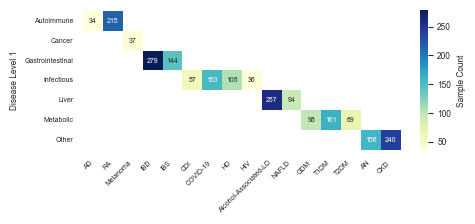

In [91]:
# Heatmap of sample count
sns.set_style("whitegrid")
plt.figure(figsize=(5, 5))
sns.heatmap(
    sample_count_pivot.reindex(columns=disease_level_2_order), 
    annot=True, 
    annot_kws={"size": 5},
    fmt="d", 
    cmap="YlGnBu",  # Yellow-Green-Blue color palette
    mask=(sample_count_pivot.reindex(columns=disease_level_2_order) == 0),
    cbar_kws={"shrink": 0.3, "label": "Sample Count"},
    square=True
)
cbar = plt.gcf().axes[-1]  # Get the color bar axis
cbar.set_ylabel('Sample Count', fontsize=6)
cbar.tick_params(labelsize=6)
#plt.title('Heatmap of Sample Count between Disease Level 1 and Disease Level 2')
plt.xlabel('', fontsize=6)
plt.ylabel('Disease Level 1',fontsize=6)
plt.xticks(rotation=45, ha='right',fontsize=5)
plt.yticks(fontsize=5)
plt.tight_layout()

plt.savefig('/Users/cheesemania/PycharmProjects/mscthesis_wrkdir/src-plots/heatmap1.png', dpi=600, bbox_inches='tight')
plt.show()

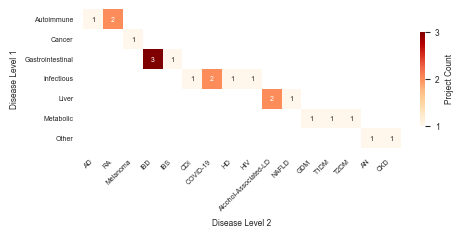

In [87]:
# Heatmap of project count
sns.set_style("whitegrid")
plt.figure(figsize=(5, 5))
sns.heatmap(
    project_count_pivot.reindex(columns=disease_level_2_order), 
    annot=True, 
    annot_kws={"size": 5},
    fmt="d", 
    cmap="OrRd",
    mask=(project_count_pivot.reindex(columns=disease_level_2_order) == 0),
    cbar_kws={'ticks': range(int(project_count_pivot.max().max()) + 1), 'shrink': 0.2, "label": "Project Count"},
    square=True
)
cbar = plt.gcf().axes[-1]  # Get the color bar axis
cbar.set_ylabel('Project Count', fontsize=6)
cbar.tick_params(labelsize=6)
#plt.title('Heatmap of Project Count between Disease Level 1 and Disease Level 2')
plt.xlabel('Disease Level 2', fontsize=6)
plt.ylabel('Disease Level 1',fontsize=6)
plt.xticks(rotation=45, ha='right',fontsize=5)
plt.yticks(fontsize=5)
plt.tight_layout()

plt.savefig('/Users/cheesemania/PycharmProjects/mscthesis_wrkdir/src-plots/heatmap2.png', dpi=600, bbox_inches='tight')
plt.show()